In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
import sklearn.cluster as cluster
from ema_workbench.analysis import prim
%matplotlib inline
plt.style.use('fivethirtyeight')

/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})


In [3]:
df = pd.read_csv("CodedOutputs/survey_coded.csv")

In [4]:
print(len(df))

58


In [5]:
df = df.fillna(0)
surveyData = df[df.columns[1:-1]].values

In [9]:
df['Survey1']=["Combined" in d for d in df['Unnamed: 0']]

In [18]:
len(df)

58

In [17]:
surveyData[:,2:].shape

(58, 84)

In [35]:
import umap
reducer  = umap.UMAP(
    n_neighbors=2,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

In [36]:
embedding = reducer.fit_transform(surveyData[:,2:])
embedding.shape


/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(58, 2)

In [37]:
embedding[:][df['Survey1']]

array([[ 6.2820826, -4.3825073],
       [-0.4715426, -5.97764  ],
       [-5.552138 ,  1.2589858],
       [-2.6541784,  1.0601623],
       [ 6.2333274, -4.1855035],
       [ 3.8586938, -2.893996 ],
       [ 4.6062913, -5.758915 ],
       [ 3.7681856, -2.8043234],
       [ 3.8017378, -2.836975 ],
       [ 4.679582 , -4.8299704],
       [ 6.1570144, -4.7721596],
       [ 6.507743 , -4.973327 ],
       [ 6.2989492, -4.093441 ],
       [ 6.53841  , -5.027848 ],
       [-3.618918 ,  0.8634579],
       [-7.2173038,  1.9387848],
       [-0.4715595, -5.9776697]], dtype=float32)

/home1/06659/wmobley/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


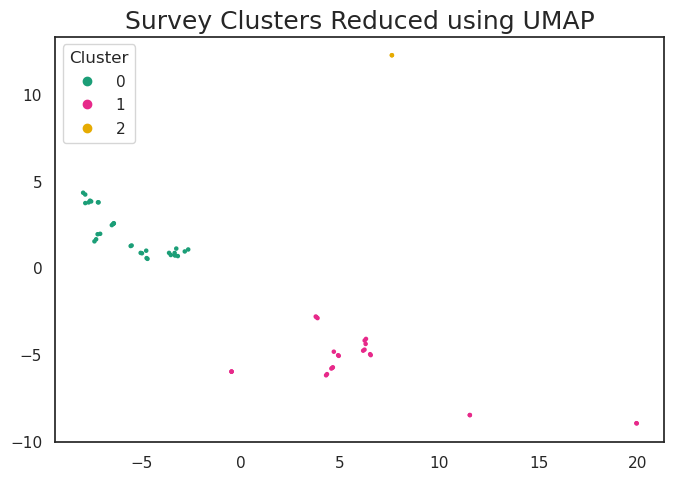

In [39]:
import matplotlib as mpl

kmeans_labels = cluster.KMeans(n_clusters=3).fit_predict(embedding)
cmap = mpl.colors.ListedColormap(["#1b9e77", "#d95f02", "#7570b3","#e7298a", "#66a61e","#e6ab02"])
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=5, cmap=cmap);

plt.legend(*scatter.legend_elements(num=2),
                    loc="upper left", title="Cluster")
plt.title('Survey Clusters Reduced using UMAP', fontsize=18);

In [32]:
c = df.columns[1:-2].tolist()
c.append('Survey1')
c

['All',
 'Audience',
 'Stage in Water Process',
 'Administrative process',
 'Administrative Considerations',
 'Compliance',
 'Strategic Planning',
 'Funding',
 'Worker Safety',
 'Health care',
 'Water Quality ',
 'Testing',
 'Laboratory',
 'Field',
 'At-home',
 'Source Water Testing',
 'Biological',
 'Chemical',
 'Physical contaminents',
 'Possible Contamination Sources',
 'Effluent at End of Treatment Process',
 'Biological.1',
 'Chemical.1',
 'Physical properties.1',
 'Water received by the end-user',
 'Biological.2',
 'Chemical.2',
 'Physical Properties.1',
 'Treatment Process',
 'Operating System',
 'Equipment Installation',
 'Equipment Operations',
 'Equipment Maintenance',
 'System Components',
 'System Monitoring',
 'Design Considerations',
 'Threats and Security',
 'Climate and Environment',
 'Cybersecurity',
 'System Breakdown',
 'Hazardous Materials',
 'Technical Considerations',
 'Technical Background',
 'Social Background',
 'Social Considerations',
 'Certification',
 'Stat

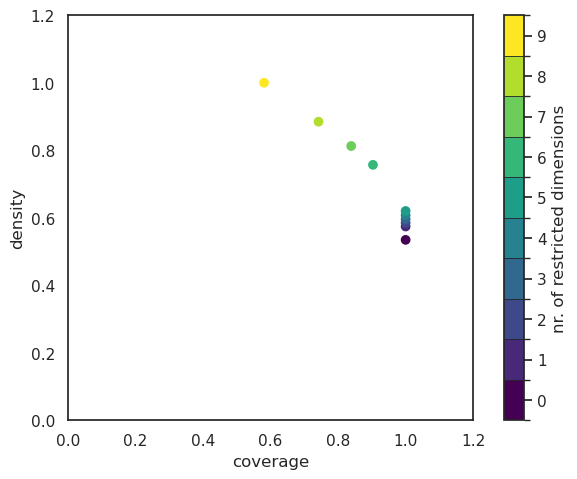

coverage    0.838710
density     0.812500
id          7.000000
mass        0.551724
mean        0.812500
res_dim     7.000000
Name: 7, dtype: float64

                               box 7                        
                                 min  max qp value  qp value
Physical Properties.1            0.0  0.0      NaN  0.054378
Health care                      0.0  0.0      NaN  0.308029
Chemical.2                       0.0  0.0      NaN  0.467252
Equipment Installation           0.0  0.0      NaN  0.606880
Cybersecurity                    0.0  0.0      NaN  0.606880
Statistics on Certified People   0.0  0.0      NaN  0.606880
Negative implications            0.0  0.0      NaN  0.606880



[None]

In [46]:
y = kmeans_labels==0


p = prim.Prim(df[df.columns[3:]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(7)

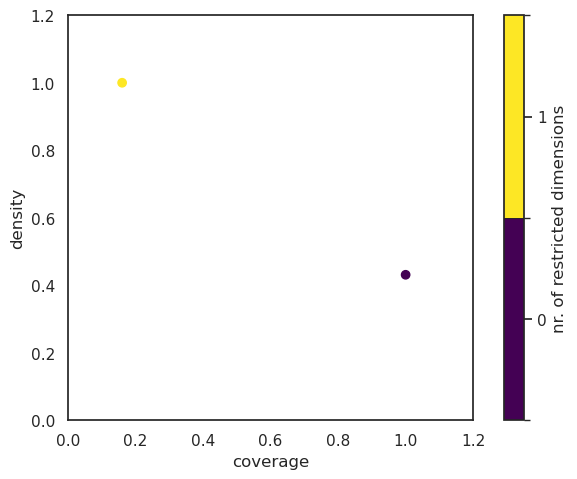

coverage    1.000000
density     0.431034
id          0.000000
mass        1.000000
mean        0.431034
res_dim     0.000000
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp value), (box 0, qp value)]
Index: []



[None]

In [44]:
y = kmeans_labels==1


p = prim.Prim(df[df.columns[3:]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(0)

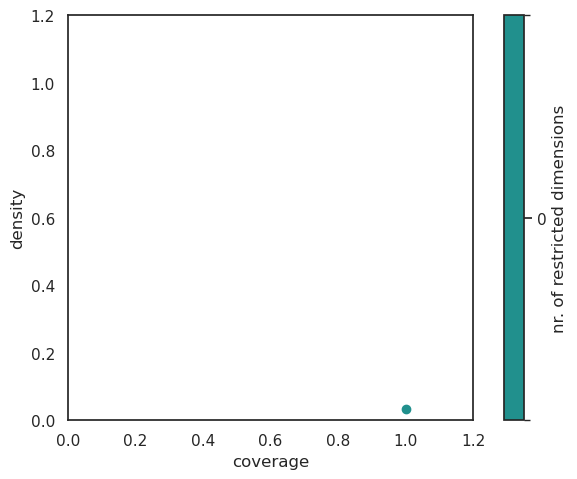

IndexError: single positional indexer is out-of-bounds

In [45]:
y = kmeans_labels==2


p = prim.Prim(df[df.columns[3:]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(3)

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[i for i, f in enumerate(df.file)] ,s=10, cmap='Spectral');

In [ ]:
y = kmeans_labels==3


p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(2)

In [ ]:
y = kmeans_labels==4


p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(2)

In [ ]:
y = kmeans_labels==5


p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(2)

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[i for i, f in enumerate(df.file)], cmap='Spectral', s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(df))).set_ticks(np.arange(len(df)/3))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
df['x']=embedding[:,0] 
df['y']=embedding[:,1] 
df['cluster']=kmeans_labels
df.to_csv("SurveyClusters.csv", index=False)